### Goal:

* **Use Python tools to recognize outliers and remove them**
* **Dealing with Missing data**
* **Dealing with Categorical data**
* **Scaling the data**
* **Use Elastic Net for a selling house prediction**
* **Use Grid Search**
* **Use Cross Validation**

---

The main goal of the project is to analyze the Ames housing dataset and to use a Linear Regression model to make predictions about the selling price of a house. I will use python to recognize outliers and remove them. I will also do some feature engineering to deal with missing data and to decide when to drop the data and when to transform the data. After that i will dealing with categorical data to make it ready for linear regression algorithm. At the end i will use grid search to find the optimal parameters combination with Elastic net.

## Ames_Housing_Data

Let's explore any extreme outliers in the Ames Housing Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Ames_Housing_Data.csv')

In [3]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.info

<bound method DataFrame.info of             PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0     526301100           20        RL         141.0     31770   Pave   NaN   
1     526350040           20        RH          80.0     11622   Pave   NaN   
2     526351010           20        RL          81.0     14267   Pave   NaN   
3     526353030           20        RL          93.0     11160   Pave   NaN   
4     527105010           60        RL          74.0     13830   Pave   NaN   
...         ...          ...       ...           ...       ...    ...   ...   
2925  923275080           80        RL          37.0      7937   Pave   NaN   
2926  923276100           20        RL           NaN      8885   Pave   NaN   
2927  923400125           85        RL          62.0     10441   Pave   NaN   
2928  924100070           20        RL          77.0     10010   Pave   NaN   
2929  924151050           60        RL          74.0      9627   Pave   NaN   

     Lot Shape Land

In [5]:
df.describe

<bound method NDFrame.describe of             PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0     526301100           20        RL         141.0     31770   Pave   NaN   
1     526350040           20        RH          80.0     11622   Pave   NaN   
2     526351010           20        RL          81.0     14267   Pave   NaN   
3     526353030           20        RL          93.0     11160   Pave   NaN   
4     527105010           60        RL          74.0     13830   Pave   NaN   
...         ...          ...       ...           ...       ...    ...   ...   
2925  923275080           80        RL          37.0      7937   Pave   NaN   
2926  923276100           20        RL           NaN      8885   Pave   NaN   
2927  923400125           85        RL          62.0     10441   Pave   NaN   
2928  924100070           20        RL          77.0     10010   Pave   NaN   
2929  924151050           60        RL          74.0      9627   Pave   NaN   

     Lot Shape La

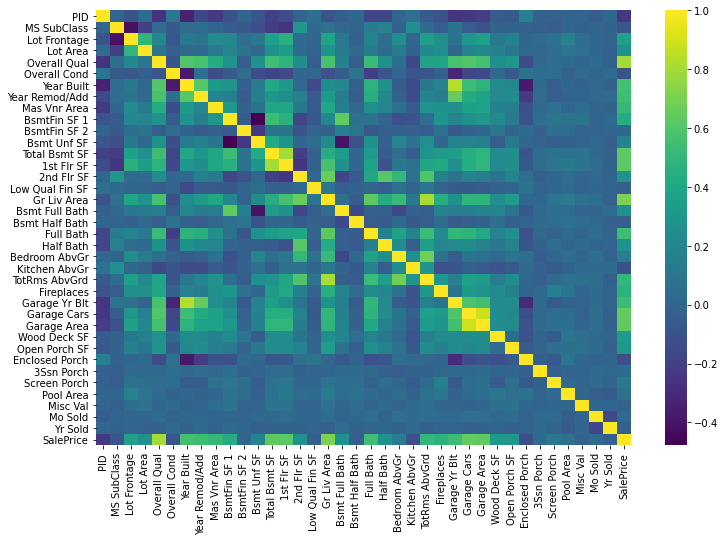

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis');

---

#### SalePrice column will be my target label column, to predict the sale price of a house
#### Let's explore the distrubution of SalePrice

In [7]:
# for the Q-Q plots
import scipy.stats as stats

In [8]:
# plot histogram and Q-Q plots to have a look at the variable distribution

def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable],kde=True);

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

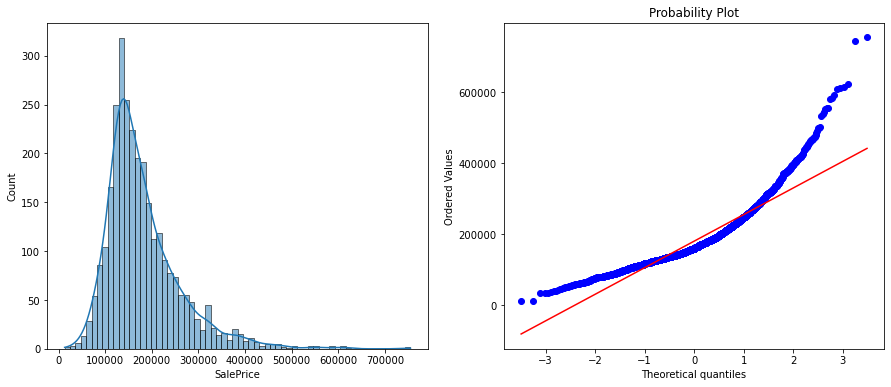

In [9]:
# check original distribution

diagnostic_plots(df, 'SalePrice')

---

#### The sales price distribution seems to be right skewed.   
#### I can't confirm that most of the observations fall below the Normal Distribution. I will do a log transformation later.

---

#### Let's explore the correlation of my target column versus other columns

In [10]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

---

#### Overall Qual is the highest correlated column with my target column. Let's make a scatter plot of a Overall Qual versus SalePrice 

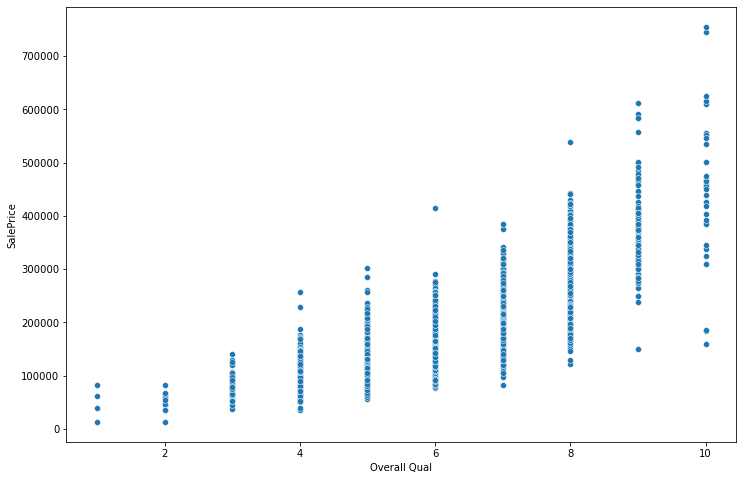

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Overall Qual', y='SalePrice', data= df);

**It is clear that the better the overall quality the bigger is the sales price. But there are a few outliers, they have an overall quality of 9 and 10 points but they are sold for a price of quality between 5 and 7**

---

#### The second most correlated column is the Living Area column. Let's plot it

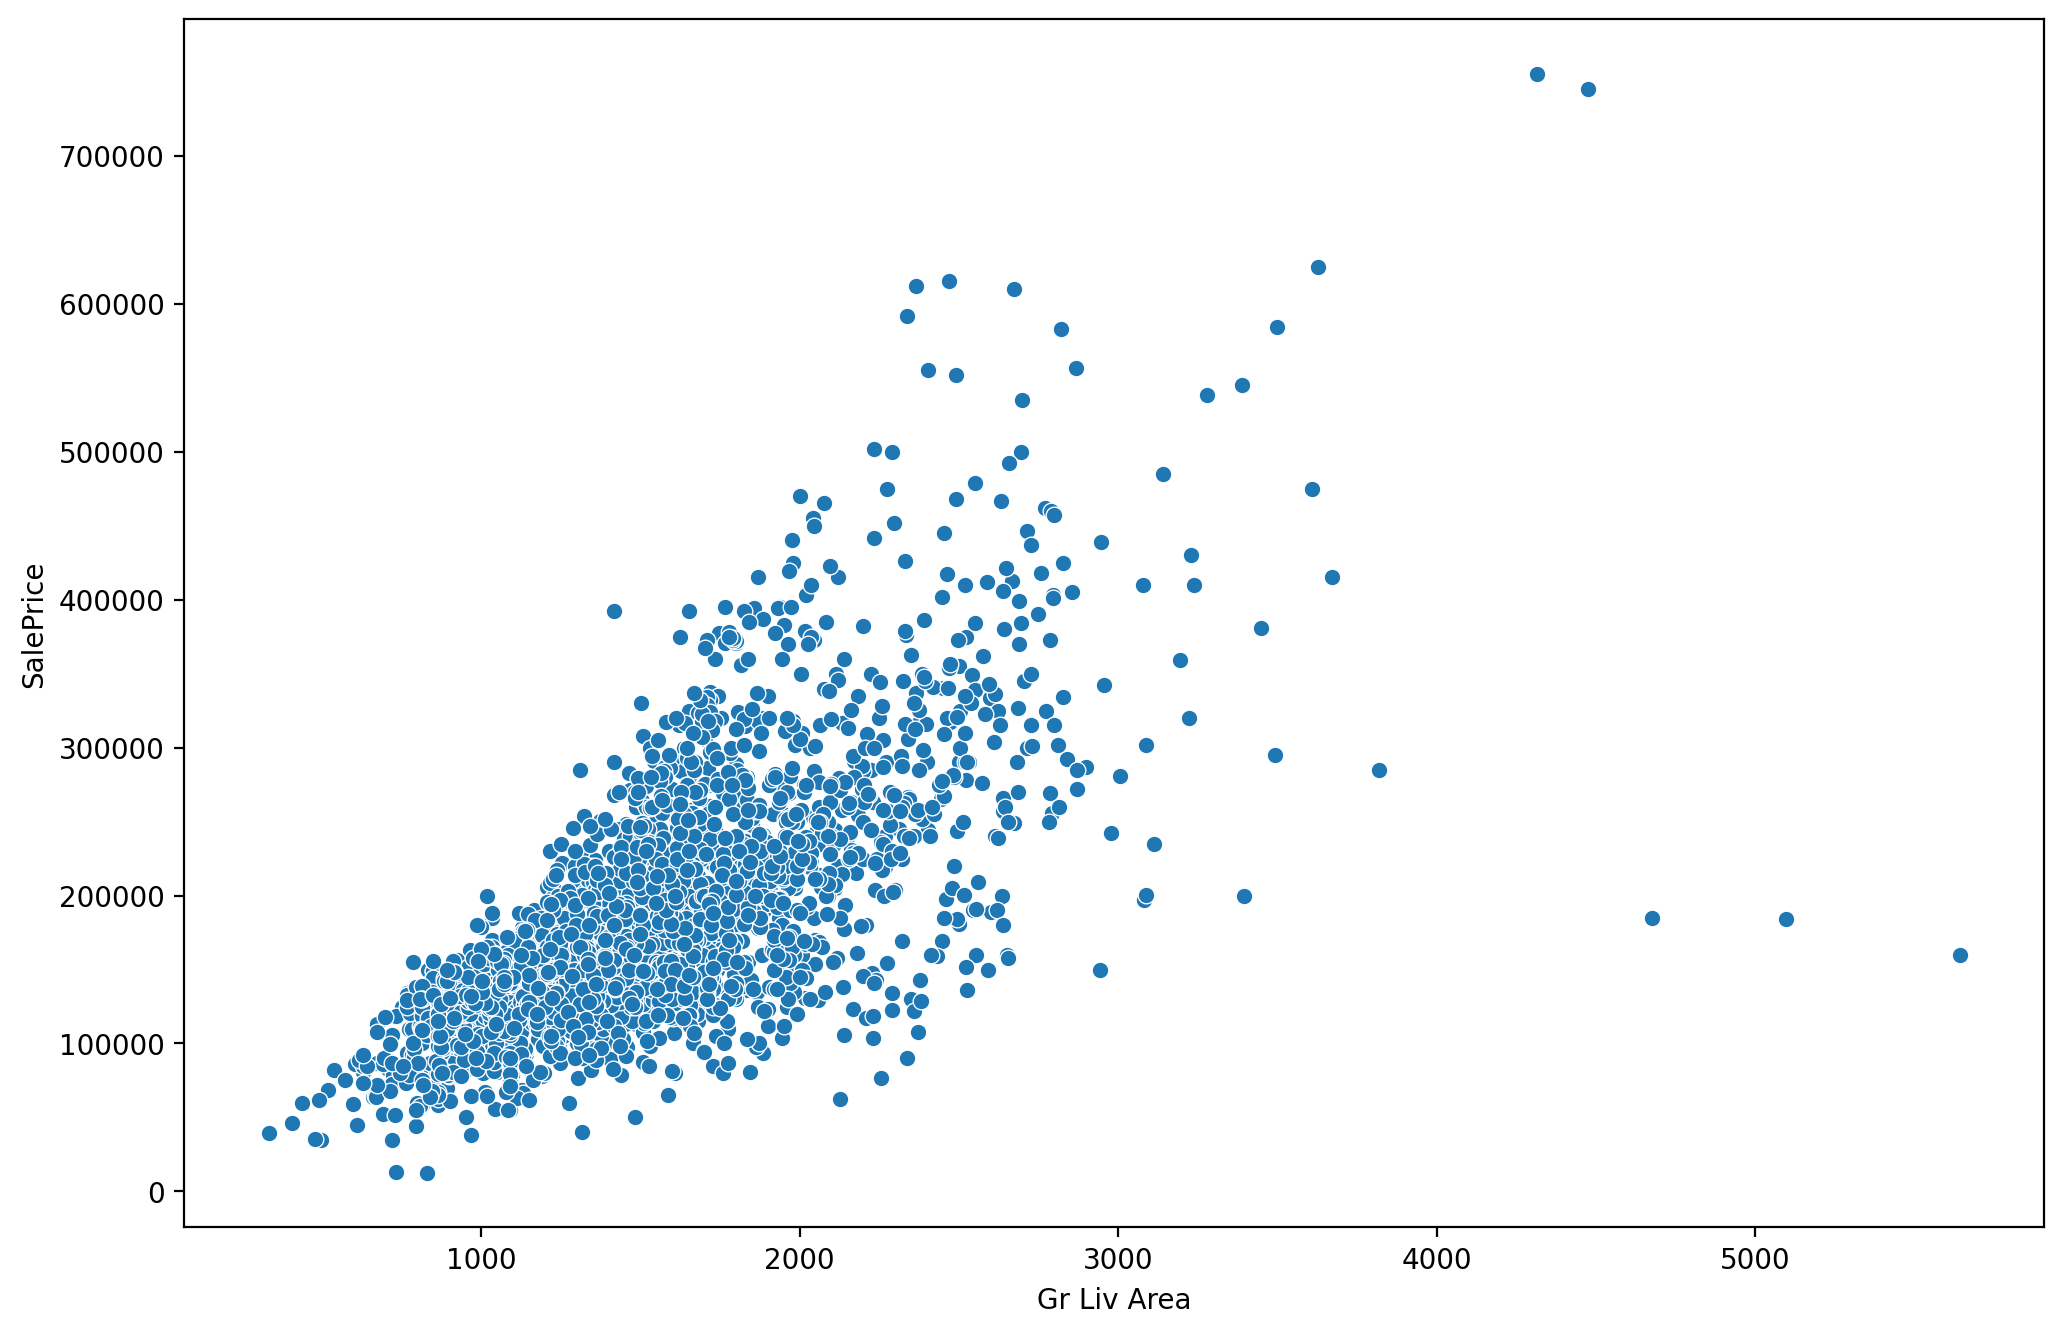

In [12]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data= df);

**I can clearly see 3 houses with a huge living area, but sold at a lower price, wich I can extract**

In [13]:
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 300000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [14]:
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 300000)].index

Int64Index([1498, 2180, 2181], dtype='int64')

---

**I can clearly identify those properties as outliers and will drop then from my data set**

In [15]:
ind_drop = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 300000)].index

In [16]:
df = df.drop(ind_drop, axis=0)

---

### Removing the PID

I already have an index, so we don't need the PID unique identifier for the regression we will perform later on

In [17]:
df = df.drop('PID',axis=1)

---

### Observing NaN Features

In [18]:
df.isnull().sum()

MS SubClass         0
MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 80, dtype: int64

---

### I will create a function that will calculate what percentage of missing data I have per column.

In [19]:
def percent_missing(df):
    percent_nan = 100 * df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [20]:
percent_nan = percent_missing(df)

### Plotting the missing data

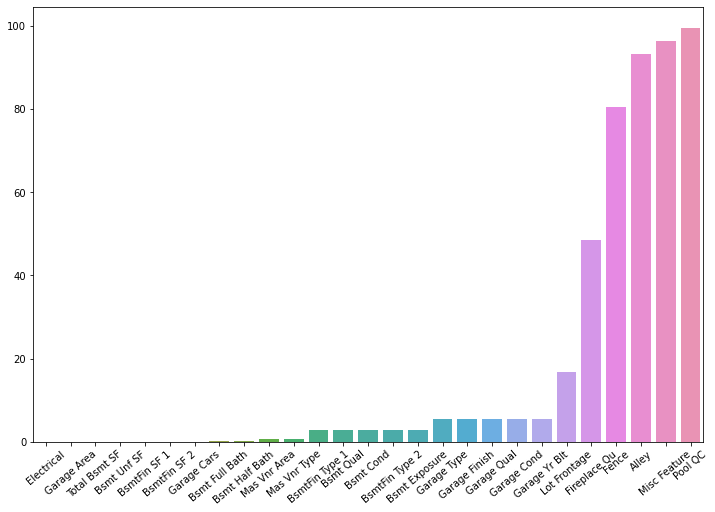

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=40);

## Filling in Data or Dropping Data?

Let's choose some threshold where I decide it is ok to drop a row if its missing some data (instead of attempting to fill in that missing data point). I will choose 1% as my threshold. This means if less than 1% of the rows are missing this feature, I will consider just dropping that row.

Based on the text description of the features, I can see that most of this missing data is actually NaN on purpose as a placeholder for 0 or "none"

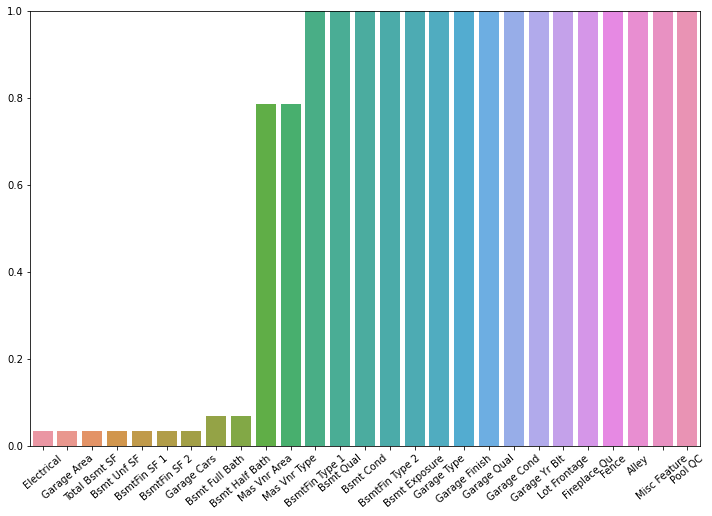

In [22]:
plt.figure(figsize=(12,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=40)

# Set 1% Threshold
plt.ylim(0,1);

In [23]:
percent_nan[percent_nan < 1]

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64

---

**Here I'm calculating the percentage of a single row**

In [24]:
100 / len(df)

0.0341646737273659

---

**For the feature 'Electrical' and 'Garage Area' I'm missing only one row and I will drop those rows instead of filling those.**

In [25]:
df = df.dropna(subset = ['Electrical', 'Garage Area'], axis=0)

In [26]:
percent_nan = percent_missing(df)

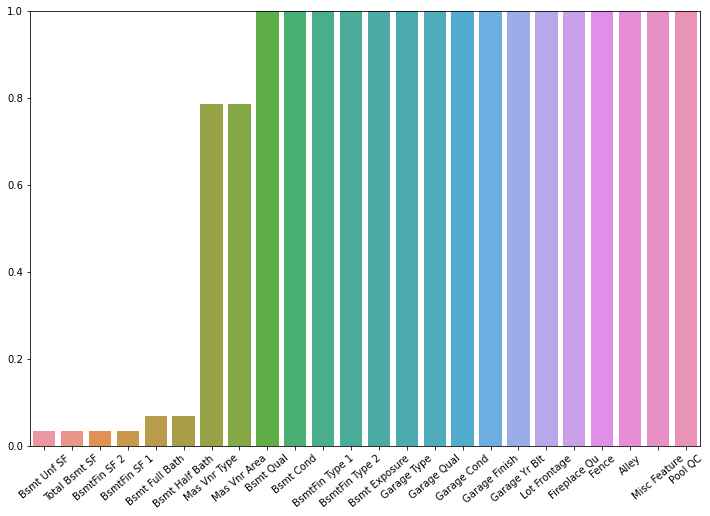

In [27]:
plt.figure(figsize=(12,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=40)

# Set 1% Threshold
plt.ylim(0,1);

---


**The text file tell us that the missing Basement features indicate houses without a basement. I will fill in the missing numerical basement features with zero and the string features with none values. It's the same for the columns Mas Vnr Type and Mas Vnr Area. The NaN's values simply means the house just doesn't have a masonry veneer.**

The numerical basement columns

In [28]:
bsmt_num_col = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Mas Vnr Type']
df[bsmt_num_col] = df[bsmt_num_col].fillna(0)

The string basement columns

In [29]:
bsmt_str_col = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Mas Vnr Area']
df[bsmt_str_col] = df[bsmt_str_col].fillna('None')

In [30]:
percent_nan = percent_missing(df)

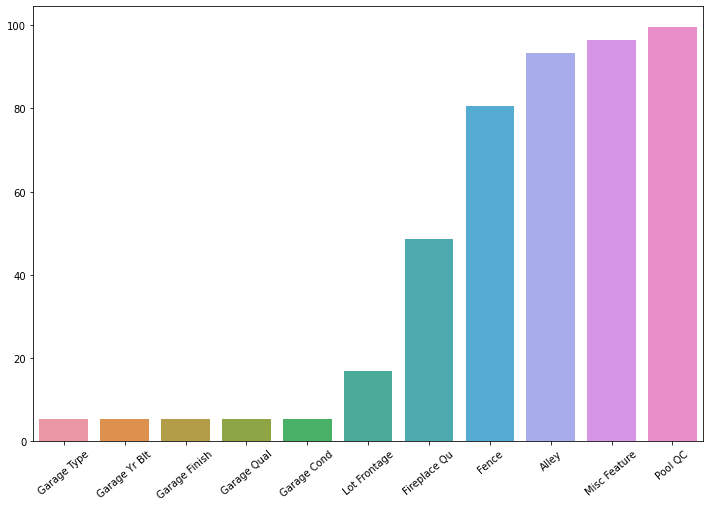

In [31]:
plt.figure(figsize=(12,8))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=40);

---

**Now I only miss data above 1%. I will consider dropping or filling based on columns.**

**The text file tell us that the missing Garage features indicate houses without a garage. I will fill in the missing numerical garage features with zero and the string features with none values.**

The string Garage columns

In [32]:
gar_str_col =['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_col]=df[gar_str_col].fillna('None')

The numerical Garage column

In [33]:
num_gar_col = ['Garage Yr Blt']
df[num_gar_col]=df[num_gar_col].fillna(0)

In [34]:
percent_nan = percent_missing(df)

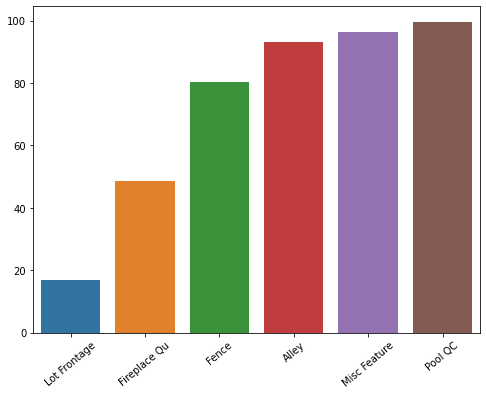

In [35]:
plt.figure(figsize=(8,6))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=40);

**Since the 'Pool QC', 'Misc Feature', 'Alley' and 'Fence' columns have over 80% missing values, I don't think they will have any predictive value, so I'll drop them from the data set.**

In [36]:
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [37]:
percent_nan = percent_missing(df)

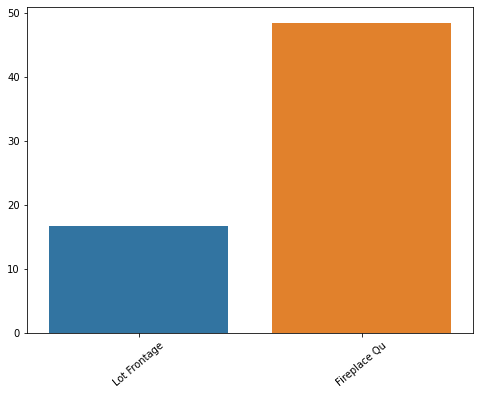

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=40);

**Since the 'Fireplace Qu' column contains string values, I will fill in the missing values with 'none' values.**

In [39]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [40]:
percent_nan = percent_missing(df)

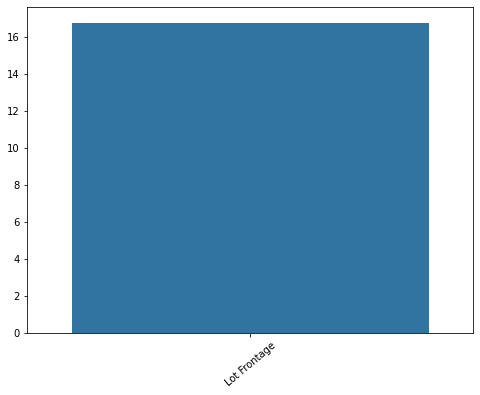

In [41]:
plt.figure(figsize=(8,6))
sns.barplot(x=percent_nan.index,y=percent_nan)
plt.xticks(rotation=40);

**Now I'm missing data only in the 'Lot Frontage' column. I will impute the missing data under the assumption that the Lot Frontage is related to what neighborhood a house is in.**

In [42]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))

In [43]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [44]:
percent_nan = percent_missing(df)

In [45]:
percent_nan

Series([], dtype: float64)

**Now that I no longer have missing values, I need to deal with categorical values. But first I need to convert the column 'MSSubClass' which is actually numeric to a string object, because the column is actually some form of integer encoding. The text file tell us that the MSSubClass: Identifies the type of dwelling involved in the sale.**

In [46]:
df['MS SubClass']

0       20
1       20
2       20
3       20
4       60
        ..
2925    80
2926    20
2927    85
2928    20
2929    60
Name: MS SubClass, Length: 2925, dtype: int64

In [47]:
df['MS SubClass'] = df['MS SubClass'].apply(str)

**I will split the data set into two parts, the numeric type and the object type part.**

**From the numeric part I will apply the square root transformation of variables.**

In [48]:
df_numeric_type = df.select_dtypes(exclude='object')

In [49]:
df_numeric_type

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,141.000000,31770,6,5,1960,1960,639.0,0.0,441.0,1080.0,...,210,62,0,0,0,0,0,5,2010,215000
1,80.000000,11622,5,6,1961,1961,468.0,144.0,270.0,882.0,...,140,0,0,0,120,0,0,6,2010,105000
2,81.000000,14267,6,6,1958,1958,923.0,0.0,406.0,1329.0,...,393,36,0,0,0,0,12500,6,2010,172000
3,93.000000,11160,7,5,1968,1968,1065.0,0.0,1045.0,2110.0,...,0,0,0,0,0,0,0,4,2010,244000
4,74.000000,13830,5,5,1997,1998,791.0,0.0,137.0,928.0,...,212,34,0,0,0,0,0,3,2010,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,1984,1984,819.0,0.0,184.0,1003.0,...,120,0,0,0,0,0,0,3,2006,142500
2926,75.144444,8885,5,5,1983,1983,301.0,324.0,239.0,864.0,...,164,0,0,0,0,0,0,6,2006,131000
2927,62.000000,10441,5,5,1992,1992,337.0,0.0,575.0,912.0,...,80,32,0,0,0,0,700,7,2006,132000
2928,77.000000,10010,5,5,1974,1975,1071.0,123.0,195.0,1389.0,...,240,38,0,0,0,0,0,4,2006,170000


C:\Users\Marko\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


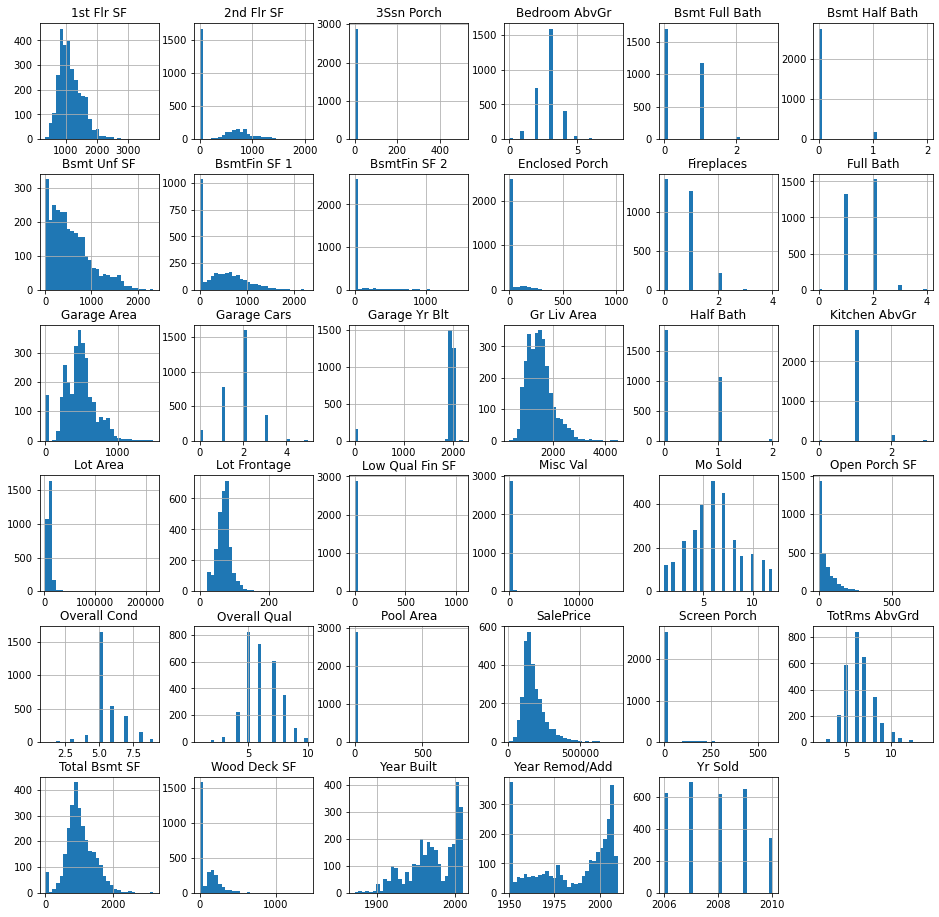

In [50]:
df_numeric_type.hist(bins=30, figsize=(16,16))
plt.show();

In [51]:
df_numeric_type = np.sqrt(df_numeric_type)

In [52]:
df_numeric_type

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
0,11.874342,178.241409,2.449490,2.236068,44.271887,44.271887,25.278449,0.000000,21.000000,32.863353,...,14.491377,7.874008,0.0,0.0,0.000000,0.0,0.000000,2.236068,44.833024,463.680925
1,8.944272,107.805380,2.236068,2.449490,44.283180,44.283180,21.633308,12.000000,16.431677,29.698485,...,11.832160,0.000000,0.0,0.0,10.954451,0.0,0.000000,2.449490,44.833024,324.037035
2,9.000000,119.444548,2.449490,2.449490,44.249294,44.249294,30.380915,0.000000,20.149442,36.455452,...,19.824228,6.000000,0.0,0.0,0.000000,0.0,111.803399,2.449490,44.833024,414.728827
3,9.643651,105.640901,2.645751,2.236068,44.362146,44.362146,32.634338,0.000000,32.326460,45.934736,...,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,2.000000,44.833024,493.963561
4,8.602325,117.601020,2.236068,2.236068,44.687806,44.698993,28.124722,0.000000,11.704700,30.463092,...,14.560220,5.830952,0.0,0.0,0.000000,0.0,0.000000,1.732051,44.833024,435.775171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,6.082763,89.089842,2.449490,2.449490,44.542115,44.542115,28.618176,0.000000,13.564660,31.670175,...,10.954451,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.732051,44.788391,377.491722
2926,8.668590,94.260278,2.236068,2.236068,44.530888,44.530888,17.349352,18.000000,15.459625,29.393877,...,12.806248,0.000000,0.0,0.0,0.000000,0.0,0.000000,2.449490,44.788391,361.939221
2927,7.874008,102.181212,2.236068,2.236068,44.631827,44.631827,18.357560,0.000000,23.979158,30.199338,...,8.944272,5.656854,0.0,0.0,0.000000,0.0,26.457513,2.645751,44.788391,363.318042
2928,8.774964,100.049988,2.236068,2.236068,44.429720,44.440972,32.726136,11.090537,13.964240,37.269290,...,15.491933,6.164414,0.0,0.0,0.000000,0.0,0.000000,2.000000,44.788391,412.310563


C:\Users\Marko\AppData\Roaming\Python\Python38\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


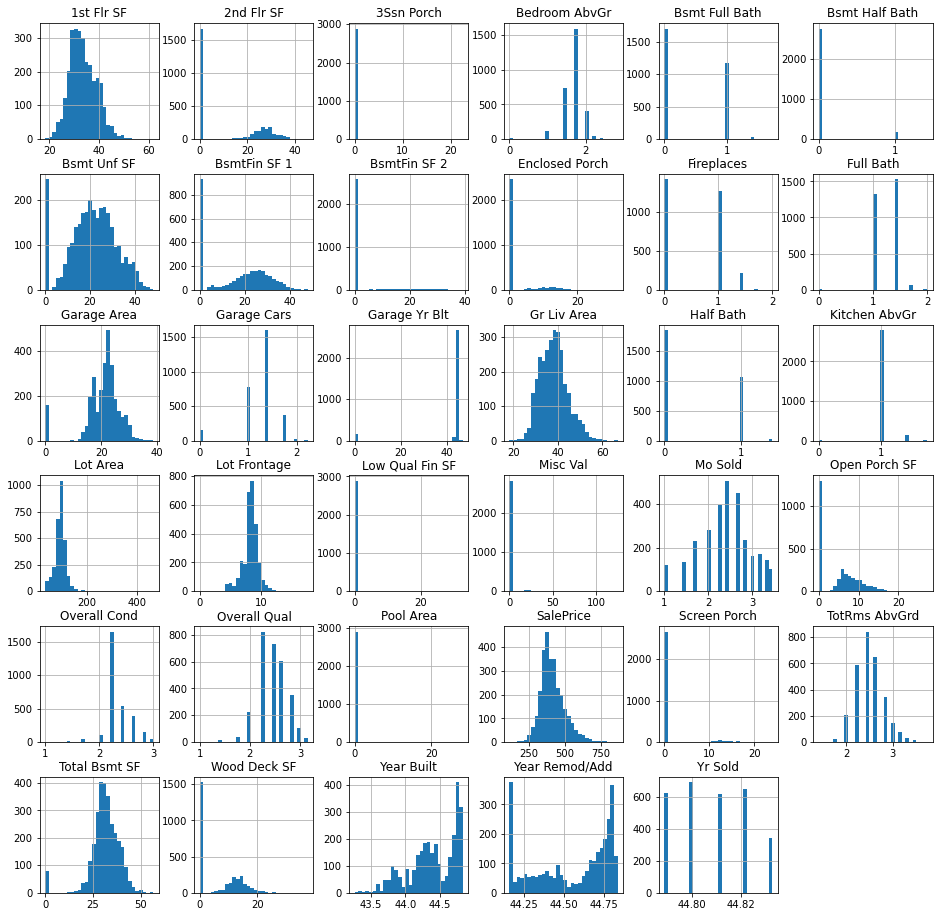

In [53]:
df_numeric_type.hist(bins=30, figsize=(16,16))
plt.show();

**From the object part I will create dummy variables.**

In [54]:
df_string_type = df.select_dtypes(include='object')

In [55]:
df_string_type = pd.get_dummies(df_string_type,drop_first=True)

**Merging the splited data sets into a final data set.**

In [56]:
final_df = pd.concat([df_numeric_type, df_string_type], axis = 1)

In [57]:
final_df.info

<bound method DataFrame.info of       Lot Frontage    Lot Area  Overall Qual  Overall Cond  Year Built  \
0        11.874342  178.241409      2.449490      2.236068   44.271887   
1         8.944272  107.805380      2.236068      2.449490   44.283180   
2         9.000000  119.444548      2.449490      2.449490   44.249294   
3         9.643651  105.640901      2.645751      2.236068   44.362146   
4         8.602325  117.601020      2.236068      2.236068   44.687806   
...            ...         ...           ...           ...         ...   
2925      6.082763   89.089842      2.449490      2.449490   44.542115   
2926      8.668590   94.260278      2.236068      2.236068   44.530888   
2927      7.874008  102.181212      2.236068      2.236068   44.631827   
2928      8.774964  100.049988      2.236068      2.236068   44.429720   
2929      8.602325   98.117277      2.645751      2.236068   44.643029   

      Year Remod/Add  BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF  \

In [58]:
final_df.corr()['SalePrice'].sort_values(ascending=False).transpose()[1:16]

Overall Qual          0.811973
Gr Liv Area           0.733595
1st Flr SF            0.638176
Year Built            0.597260
Garage Cars           0.592077
Garage Area           0.591409
Total Bsmt SF         0.588397
Year Remod/Add        0.570144
Full Bath             0.550925
Foundation_PConc      0.544346
Fireplaces            0.512310
TotRms AbvGrd         0.506634
Exter Qual_Gd         0.485593
BsmtFin Type 1_GLQ    0.465964
Open Porch SF         0.430796
Name: SalePrice, dtype: float64

**I will select 15 columns that are most correlated with the target for my fetures columns.**

In [59]:
final_df.corr()['SalePrice'].sort_values(ascending=False).transpose()[1:16].index

Index(['Overall Qual', 'Gr Liv Area', '1st Flr SF', 'Year Built',
       'Garage Cars', 'Garage Area', 'Total Bsmt SF', 'Year Remod/Add',
       'Full Bath', 'Foundation_PConc', 'Fireplaces', 'TotRms AbvGrd',
       'Exter Qual_Gd', 'BsmtFin Type 1_GLQ', 'Open Porch SF'],
      dtype='object')

In [60]:
X = final_df[['Overall Qual', 'Gr Liv Area', 'Total Bsmt SF', 'Garage Cars',
       '1st Flr SF', 'Garage Area', 'Year Built', 'Full Bath',
       'Year Remod/Add', 'Foundation_PConc', 'TotRms AbvGrd', 'Fireplaces',
       'BsmtFin Type 1_GLQ', 'BsmtFin SF 1', 'Exter Qual_Gd']]
y = final_df['SalePrice']

In [61]:
X.shape

(2925, 15)

In [62]:
y.shape

(2925,)

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

**Scaling the data.**

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [67]:
X_train = scaler.fit_transform(X_train)

In [68]:
X_test = scaler.transform(X_test)

In [69]:
X_train.shape

(2340, 15)

In [70]:
y_train.shape

(2340,)

**Seting the model and parameters for alpha and the L1 ratio.**

In [71]:
from sklearn.linear_model import ElasticNet

In [72]:
model = ElasticNet(max_iter=10000)

In [73]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

**Seting the ElasticNet model.**

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [76]:
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=10000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [77]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [78]:
grid_model.best_estimator_

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [79]:
from sklearn import metrics

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

In [84]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')

In [85]:
test_pred = grid_model.predict(X_test)
train_pred = grid_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 24.128893971092822
MSE: 1096.0088928216758
RMSE: 33.10602502297242
R2 Square 0.8431943073113488
__________________________________
Train set evaluation:
_____________________________________
MAE: 22.81541950184958
MSE: 955.7778991551145
RMSE: 30.915657831511762
R2 Square 0.8753241799547397
__________________________________


**KNN Regression**

In [86]:
from sklearn.neighbors import KNeighborsRegressor

In [87]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [88]:
test_pred = knn_model.predict(X_test)
train_pred = knn_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 21.925117801027284
MSE: 942.0396771515899
RMSE: 30.692664875367043
R2 Square 0.8652226409079123
__________________________________
Train set evaluation:
_____________________________________
MAE: 17.86992787191176
MSE: 631.6262792141603
RMSE: 25.13217617346656
R2 Square 0.9176079250286349
__________________________________


**RandomForestRegressor**

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rfr_model = RandomForestRegressor(n_estimators=1000)

In [91]:
rfr_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [92]:
test_pred = rfr_model.predict(X_test)
train_pred = rfr_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 19.57686043276363
MSE: 853.8295941954442
RMSE: 29.22036266365365
R2 Square 0.8778428333631503
__________________________________
Train set evaluation:
_____________________________________
MAE: 7.130664292044588
MSE: 103.26526546735047
RMSE: 10.161951853229304
R2 Square 0.9865296302983001
__________________________________


**Suport Vector Regressor**

In [93]:
from sklearn.svm import SVR

In [94]:
svr_model = SVR()

In [95]:
svr_model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [96]:
test_pred = svr_model.predict(X_test)
train_pred = svr_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 28.887375867388183
MSE: 2192.867515004454
RMSE: 46.828063327501106
R2 Square 0.6862670440752885
__________________________________
Train set evaluation:
_____________________________________
MAE: 29.60989822813732
MSE: 2373.2500403039126
RMSE: 48.716014207895874
R2 Square 0.690422957876621
__________________________________
